# Introducción
## Ejemplo de Aprendizaje Automático

### El Conjunto de Datos Iris

Como ejemplo de un conjunto de datos simple, vamos a echar un vistazo al conjunto de datos iris almacenados por scikit-learn.
Los datos consisten en medidas de tres especies diferentes de flores de iris. Las tres especies de iris de este conjunto de datos particular se ilustran a continuación:


<img src="../figuras/iris_types.jpg" width="100%">


Los datos consisten en lo siguiente:

-  Atributos (Características) del conjunto de datos Iris:

   1. longitud del sépalo en cm
   2. anchura del sépalo en cm
   3. longitud del pétalo en cm
   4. anchura del pétalo en cm


- Clases objetivo para predecir:

   1. Iris Setosa
   2. Iris Versicolour
   3. Iris Virginica

<img src="../figuras/petalo_sepalo.jpg" alt="Sépalo" style="width: 75%" align="center"/>

#### Versiones usadas en este Python Notebook

In [1]:
import sys
print("Versión de Python: {}".format(sys.version))

import pandas as pd
print("Versión de pandas: {}".format(pd.__version__))

import matplotlib
print("Versión de matplotlib: {}".format(matplotlib.__version__))

import numpy as np
print("Versión de NumPy: {}".format(np.__version__))

import scipy as sp
print("Versión de SciPy: {}".format(sp.__version__))

import IPython
print("Versión de IPython: {}".format(IPython.__version__))

import sklearn
print("Versión de scikit-learn: {}".format(sklearn.__version__))

%matplotlib inline

Versión de Python: 3.6.5 | packaged by conda-forge | (default, Apr  6 2018, 13:44:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Versión de pandas: 0.23.0
Versión de matplotlib: 2.2.2
Versión de NumPy: 1.14.3
Versión de SciPy: 1.1.0
Versión de IPython: 6.4.0
Versión de scikit-learn: 0.19.1


### Cargar el conjunto de datos Iris

In [2]:
from sklearn.datasets import load_iris
conjunto_de_datos_iris = load_iris()

El conjunto de datos iris es un diccionario con las siguientes claves:

In [3]:
print("Llaves de iris_dataset: {}".format(conjunto_de_datos_iris.keys()))

Llaves de iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


El conjunto de datos iris contiene 150 instancia y 4 atributos:

In [4]:
print("Forma de los datos: {}".format(conjunto_de_datos_iris['data'].shape))

Forma de los datos: (150, 4)


Descripción del conjunto de datos Iris:

In [5]:
print(conjunto_de_datos_iris['DESCR'][:] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Las etiquetas de las instancias son las siguientes:

In [6]:
print("Nombres Objetivo: {}".format(conjunto_de_datos_iris['target_names']))

Nombres Objetivo: ['setosa' 'versicolor' 'virginica']


Ejemplo de los datos del conjunto de datos iris:

In [7]:
print("Primeras cinco filas de datos:\n{}".format(conjunto_de_datos_iris['data'][:5]))

Primeras cinco filas de datos:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Las etiquetas o variable objetivo del conjunto de datos Iris:

In [8]:
print("Tipo del objetivo: {}".format(type(conjunto_de_datos_iris['target'])))

Tipo del objetivo: <class 'numpy.ndarray'>


In [9]:
print("Forma del objetivo: {}".format(conjunto_de_datos_iris['target'].shape))

Forma del objetivo: (150,)


In [10]:
print("Objetivo:\n{}".format(conjunto_de_datos_iris['target']))

Objetivo:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Datos de Entrenamiento y Prueba 
=====================================

Para evaluar que tan bien nuestros modelos supervisados generalizan, podemos dividir nuestros datos en un conjunto de entrenamiento y prueba:

<img src="../figuras/EntrenamientoPrueba.png" width="75%">

### Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba

In [11]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    conjunto_de_datos_iris['data'], conjunto_de_datos_iris['target'], random_state=0)

In [12]:
print("Forma de X_entrenamiento: {}".format(X_entrenamiento.shape))
print("Forma de y_entrenamiento: {}".format(y_entrenamiento.shape))

Forma de X_entrenamiento: (112, 4)
Forma de y_entrenamiento: (112,)


In [13]:
print("Forma de X_prueba: {}".format(X_prueba.shape))
print("Forma de y_prueba: {}".format(y_prueba.shape))

Forma de X_prueba: (38, 4)
Forma de y_prueba: (38,)


### Crear un Dataframe en Pandas

In [14]:
# crear un dataframe con los dayos en X_entrenamiento
# etiquete las columnas usando las cadenas de caracteres en conjunto_de_datos_iris.feature_names
iris_dataframe = pd.DataFrame(X_entrenamiento, columns=conjunto_de_datos_iris.feature_names)
iris_dataframe.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.9               3.0                4.2               1.5
1                5.8               2.6                4.0               1.2
2                6.8               3.0                5.5               2.1
3                4.7               3.2                1.3               0.2
4                6.9               3.1                5.1               2.3

#### Primero lo primero: Visualice sus datos

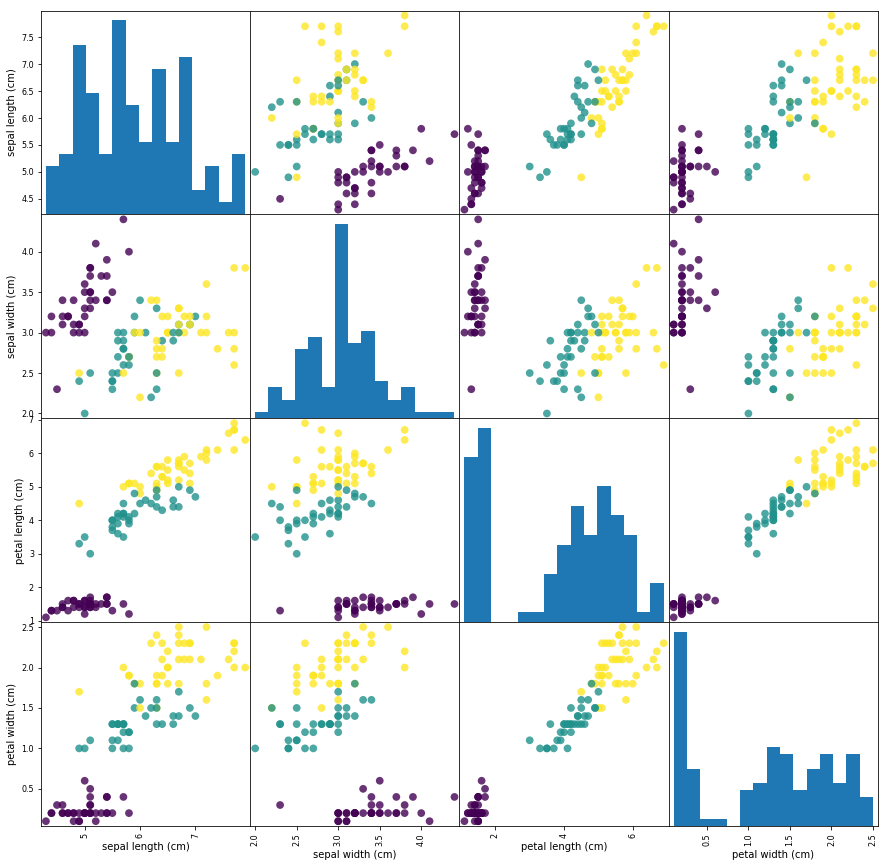

In [15]:
# crear una matriz a dispersion con el dataframe, coloreada por y_entrenamiento
grafico = pd.plotting.scatter_matrix(iris_dataframe, c=y_entrenamiento, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 15}, s=60, alpha=.8)

## Construir un primer modelo:  algoritmo k-vecinos mas cercanos (k nearest neighbors)


<img src="../figuras/knn.png" width="50%" align="center">



Importar un clasificador de vecino más cercano desde sklearn y entrenarlo utilizando el conjunto de entrenamiento

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_entrenamiento, y_entrenamiento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Haciendo predicciones

In [19]:
X_nuevo = np.array([[5, 2.9, 1, 0.2]])
print("X_nuevo.shape: {}".format(X_nuevo.shape))

X_nuevo.shape: (1, 4)


In [20]:
prediccion = knn.predict(X_nuevo)
print("Predicción: {}".format(prediccion))
print("Prediccion nombre objetivo: {}".format(
       conjunto_de_datos_iris['target_names'][prediccion]))

Predicción: [0]
Prediccion nombre objetivo: ['setosa']


#### Evaluación del modelo

In [21]:
y_pred = knn.predict(X_prueba)
print("Predicciones conjunto de prueba:\n {}".format(y_pred))

Predicciones conjunto de prueba:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
print("Resultado de la prueba: {:.2f}".format(np.mean(y_pred == y_prueba)))

Resultado de la prueba: 0.97


In [23]:
print("Resultado de la prueba: {:.2f}".format(knn.score(X_prueba, y_prueba)))

Resultado de la prueba: 0.97


### Resumen

In [24]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    conjunto_de_datos_iris['data'], conjunto_de_datos_iris['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_entrenamiento, y_entrenamiento)

print("Resultado de la prueba: {:.2f}".format(knn.score(X_prueba, y_prueba)))

Resultado de la prueba: 0.97
